Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)

---


In this notebook, we will explore multi-variate datasets: a tri-variate bluejay dataset and an iris dataset with 4 variables and see how to visualize them, explore projections from high-dimensions to 2D. 

**Expected learning outcomes**:   

*   Visualize multi-variate datasets using scatter plot
*   Visualize multi-variate datasets using biplot



In [ ]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
# Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 365, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 365 (delta 81), reused 112 (delta 46), pack-reused 203
Receiving objects: 100% (365/365), 48.02 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (167/167), done.


# Biplot for tri-variate data: Bluejay dataset

Data source: Data from Keith Tarvin, Department of Biology, Oberlin College

## Load the bluejay data

In [ ]:
bluejay = pd.read_csv('/content/DataScienceForGeosciences/Ch2_StatsGeochem/bluejay.csv')

In [ ]:
bluejay.head()

,bird_id,sex,bill_depth_mm,bill_width_mm,bill_length_mm,head_length_mm,body_mass_g,skull_size_mm
0,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66
1,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38
2,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25
3,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29
4,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85


## Scatter plot

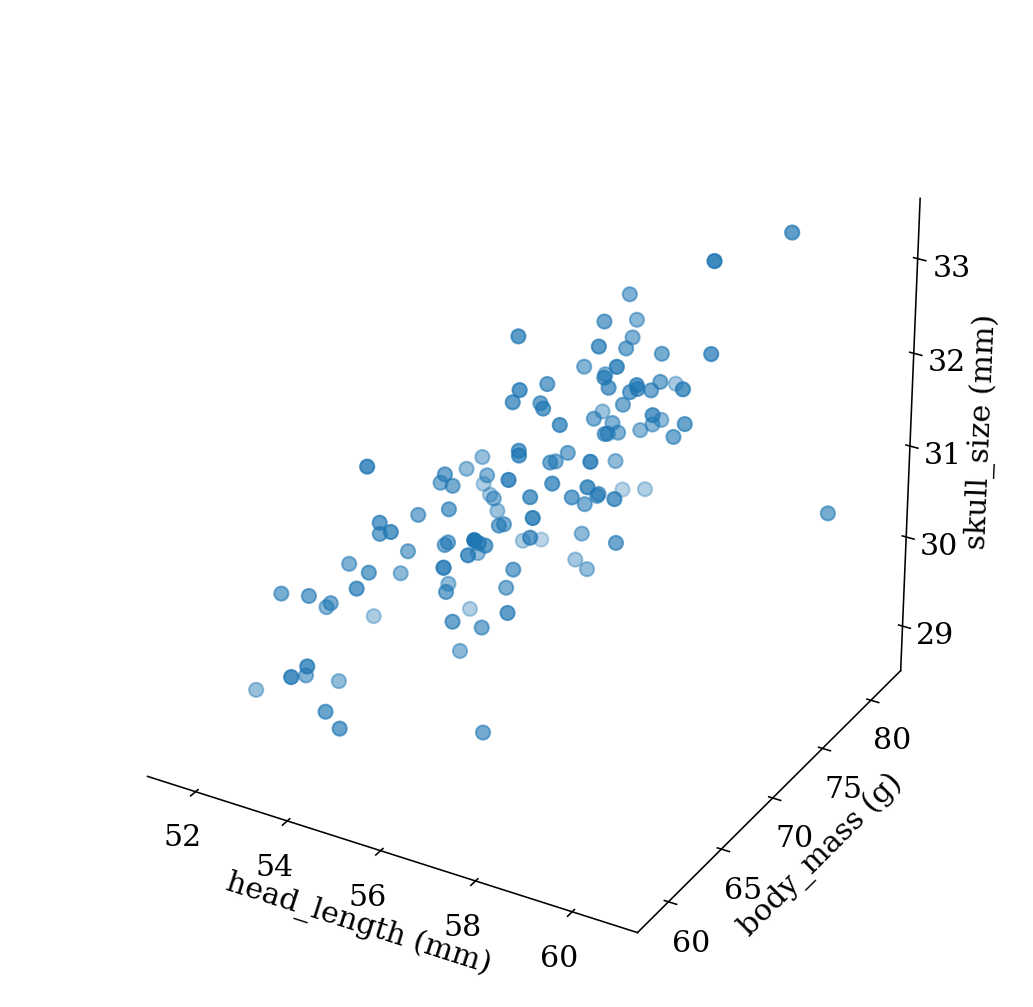

In [ ]:
matplotlib.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=[9,9])
ax = fig.add_subplot(projection='3d')
ax.scatter(bluejay['head_length_mm'], bluejay['body_mass_g'], bluejay['skull_size_mm'],s = 50)
ax.set_xlabel('head_length (mm)')
ax.set_ylabel('body_mass (g)')
ax.set_zlabel('skull_size (mm)')
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


Pairwise scatter plot

In [ ]:
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

<Figure size 1440x1440 with 0 Axes>

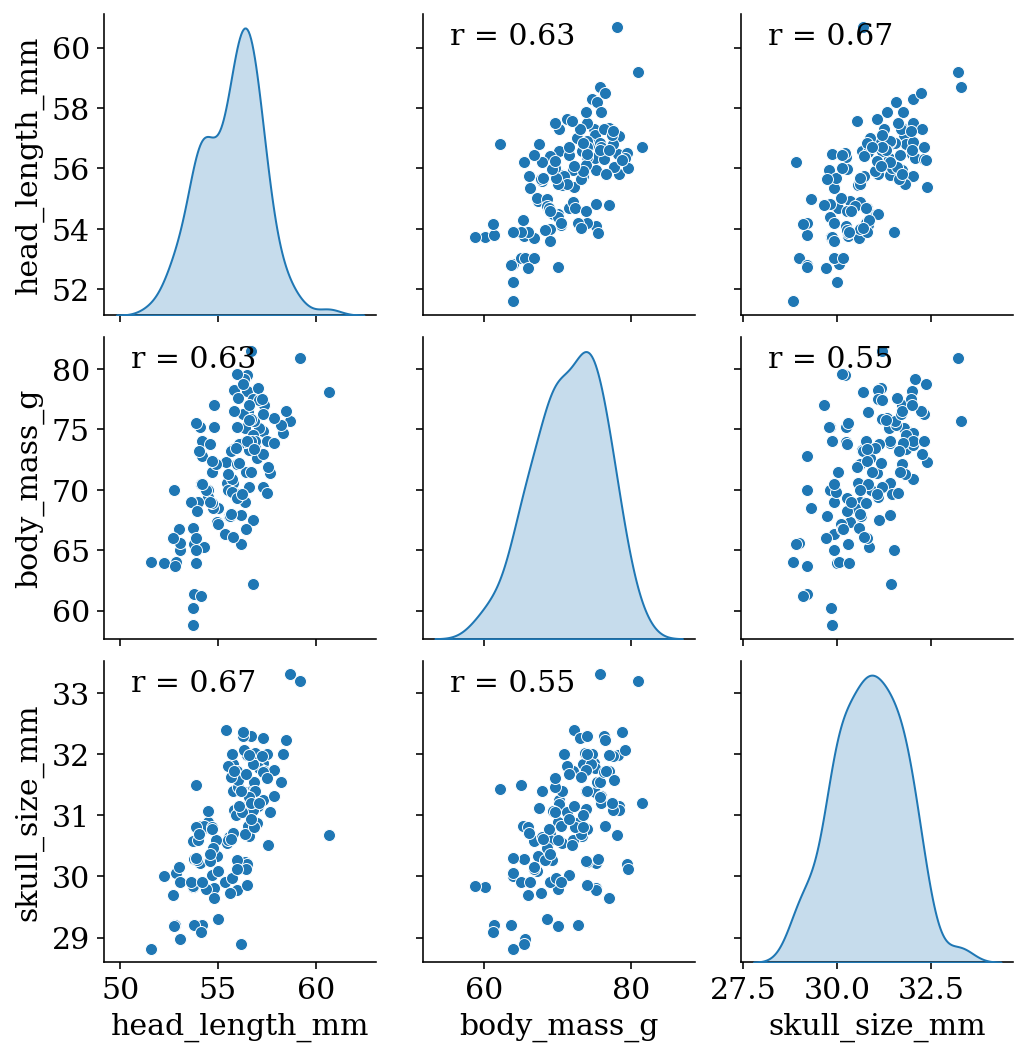

In [ ]:
fig = plt.figure(figsize=[20,20])
g = sns.pairplot(bluejay[bluejay.columns[5:]], kind = 'scatter', diag_kind='kde')
g.map_lower(corrfunc)
g.map_upper(corrfunc)

## Biplot

In [ ]:
def biplot_return_G_H(data,alpha = 0):
    u, s, v = np.linalg.svd(data)
    u = u[:,:len(s)]
    mat1 = np.diag(np.power(s,alpha))
    mat2 = np.diag(np.power(s,1-alpha))
    G = np.dot(u,mat1)
    H = np.dot(mat2,v)
    return G, H

In [ ]:
from sklearn.preprocessing import StandardScaler
data = bluejay[bluejay.columns[5:]].values
scaler = StandardScaler(with_std=False)
data = scaler.fit_transform(data)

In [ ]:
alpha = 1
G, H = biplot_return_G_H(data,alpha = alpha)

Text(0.5, 1.0, 'Covariance biplot: alpha = 1')

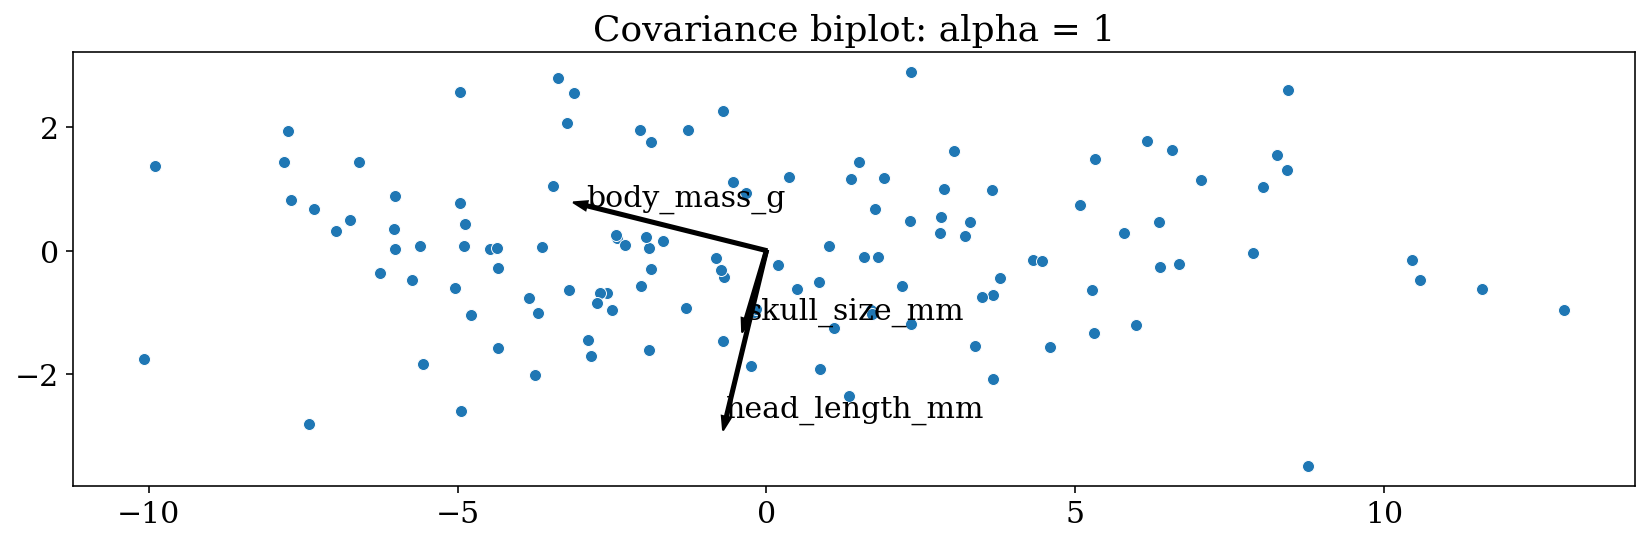

In [ ]:
comp_index = np.array([0,1])
D = 3
plt.figure(figsize=[14,14])
sns.scatterplot(G[:,comp_index[0]],G[:,comp_index[1]])
for i in range(D):
    plt.arrow(0, 0, H[comp_index[0],i]*3,
              H[comp_index[1],i]*3, width = 0.05,
              color='black',zorder = 2)
    plt.text(H[comp_index[0],i]*3, H[comp_index[1],i]*3, bluejay.columns[5+i], size = 15, zorder = 20)
plt.gca().set(aspect='equal')
plt.title('Covariance biplot: alpha = '+str(alpha))

In [ ]:
alpha = 0
G, H = biplot_return_G_H(data,alpha = alpha)

Text(0.5, 1.0, 'Form biplot: alpha = 0')

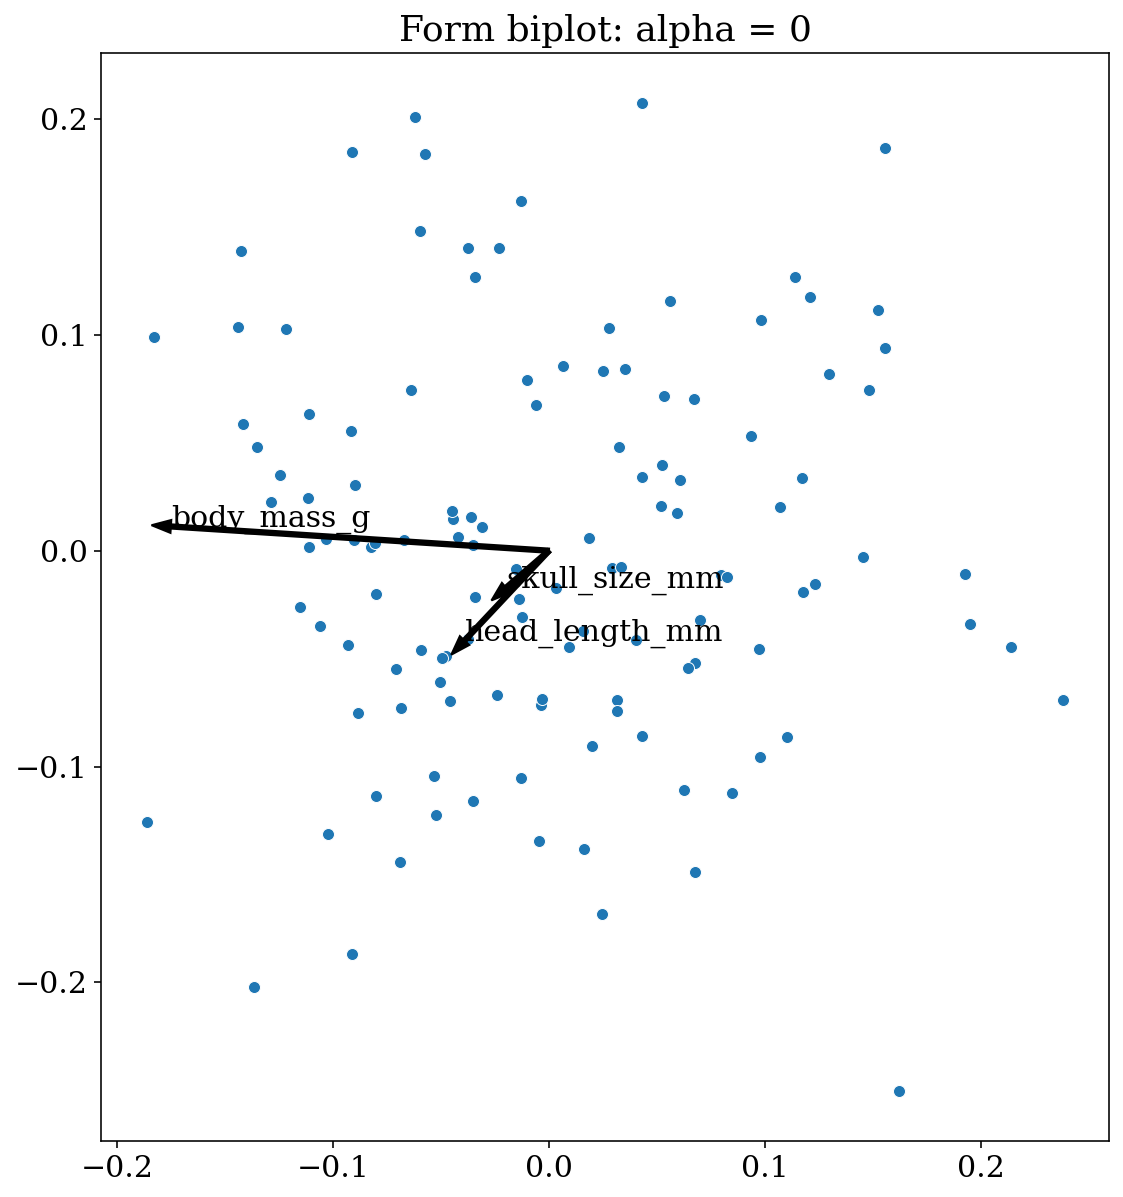

In [ ]:
comp_index = np.array([0,1])

plt.figure(figsize=[10,10])
sns.scatterplot(G[:,comp_index[0]],G[:,comp_index[1]])
for i in range(D):
    plt.arrow(0, 0, H[comp_index[0],i]/300,
              H[comp_index[1],i]/300, width = 0.002,
              color='black',zorder = 2)
    plt.text(H[comp_index[0],i]/300, H[comp_index[1],i]/300, bluejay.columns[5+i], size = 15, zorder = 20)
plt.gca().set(aspect='equal')
plt.title('Form biplot: alpha = '+str(alpha))

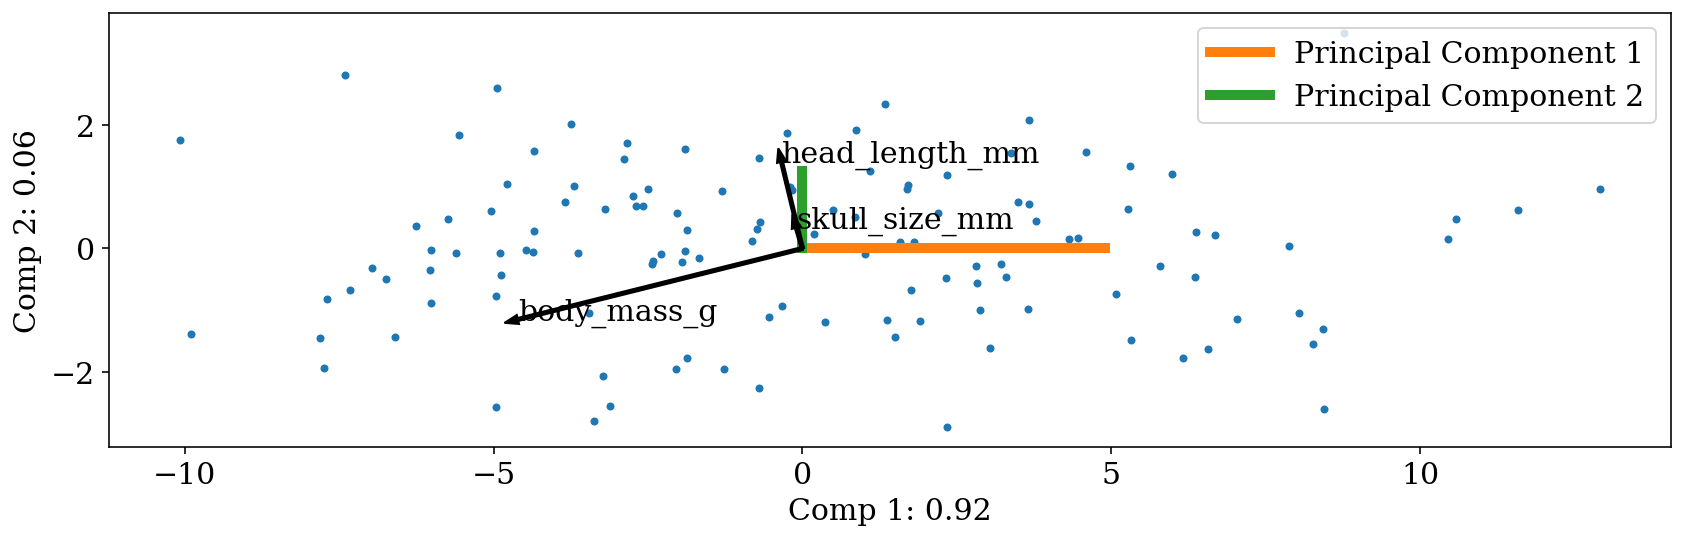

In [ ]:
# biplot for 3 variables, plot in principal component space
# same as the covariance biplot
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(bluejay[bluejay.columns[5:]].values)
std_trivariate = np.std(bluejay[bluejay.columns[5:]].values,axis = 0)

plt.figure(figsize=[14,14])
pc_scores = pca.transform(bluejay[bluejay.columns[5:]].values)

D = 3
comp_index = np.array([0,1])

plt.plot(pc_scores[:,comp_index[0]],
         pc_scores[:,comp_index[1]],'.')

plt.plot([0, np.sqrt(pca.explained_variance_[comp_index[0]])], [0, 0], linewidth=5,
          color=f"C{comp_index[0]+1}", label=f"Principal Component {comp_index[0]+1}")

plt.plot([0, 0], [0, np.sqrt(pca.explained_variance_[comp_index[1]])], linewidth=5,
          color=f"C{comp_index[1]+1}", label=f"Principal Component {comp_index[1]+1}")



for i in range(D):
    plt.arrow(0, 0,  pca.components_[comp_index[0],i]*std_trivariate[i],
              pca.components_[comp_index[1],i]*std_trivariate[i], width = 0.05,
            color='black',zorder = 2)
    
    plt.text(pca.components_[comp_index[0],i]*std_trivariate[i],pca.components_[comp_index[1],i]*std_trivariate[i], bluejay.columns[5+i], size = 15, zorder = 20)

plt.gca().set(aspect='equal')   
plt.xlabel('Comp '+str(comp_index[0]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[0]],2)))
plt.ylabel('Comp '+str(comp_index[1]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[1]],2)))

plt.legend()

# Biplot for 4 variables dataset: Iris dataset

Data source: R.A. Fisher, https://archive.ics.uci.edu/ml/datasets/iris 

## Load the iris data

In [ ]:
iris = pd.read_csv('/content/DataScienceForGeosciences/Ch2_StatsGeochem/iris.csv')

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Scatter plot

<Figure size 1440x1440 with 0 Axes>

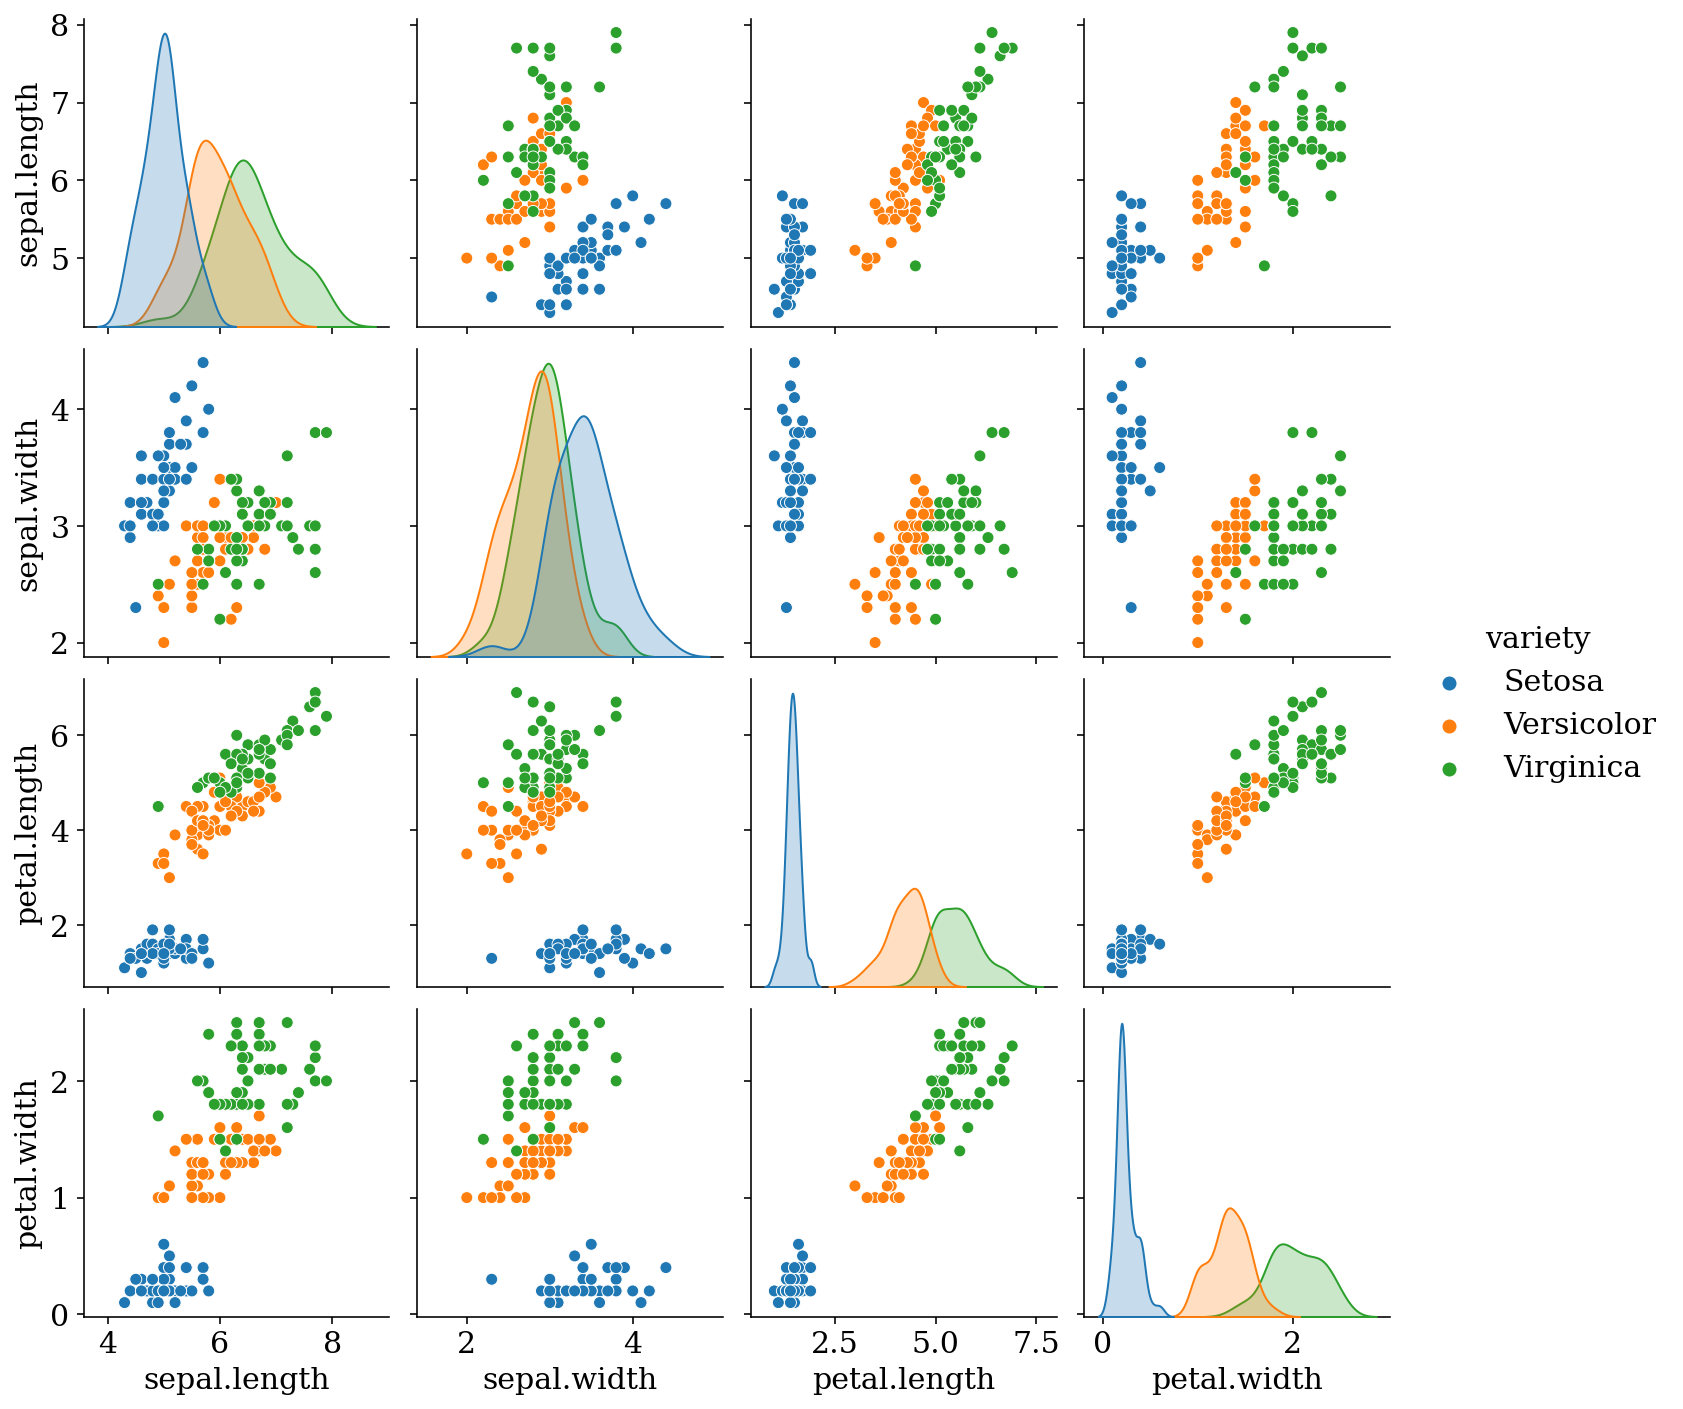

In [ ]:
fig = plt.figure(figsize=[20,20])
g = sns.pairplot(iris, kind = 'scatter', diag_kind='kde',hue="variety")

## Biplot

In [ ]:
from sklearn.preprocessing import StandardScaler
data = iris[iris.columns[:-1]].values
scaler = StandardScaler(with_std = False)
data = scaler.fit_transform(data)

In [ ]:
alpha = 1
G, H = biplot_return_G_H(data,alpha = alpha)

Text(0.5, 1.0, 'Covariance biplot: alpha = 1')

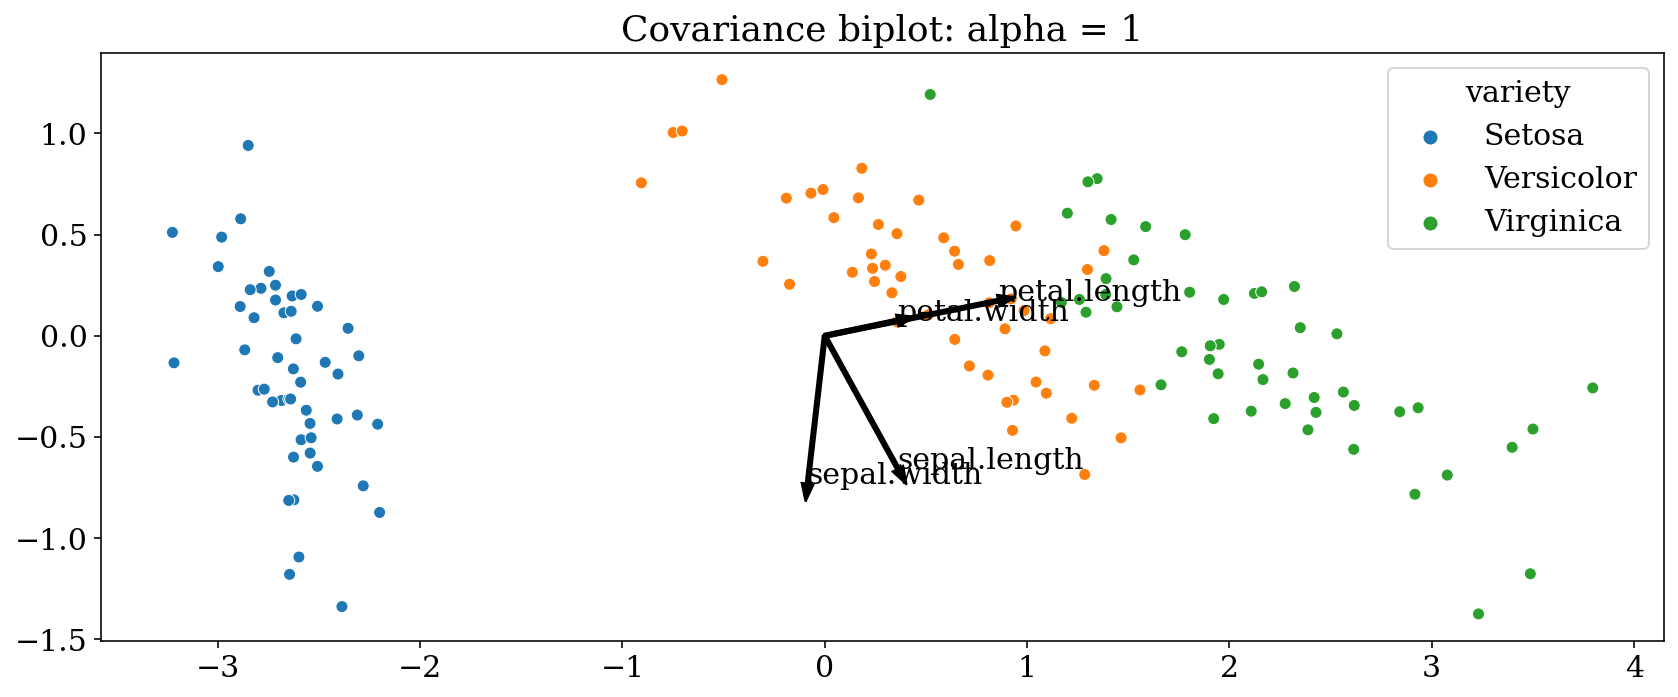

In [ ]:
comp_index = np.array([0,1])
D = 4
plt.figure(figsize=[14,14])
sns.scatterplot(G[:,comp_index[0]],G[:,comp_index[1]],hue = iris['variety'])
for i in range(D):
    plt.arrow(0, 0, H[comp_index[0],i],
              H[comp_index[1],i], width = 0.02,
              color='black',zorder = 2)
    plt.text(H[comp_index[0],i], H[comp_index[1],i], iris.columns[i], size = 15, zorder = 20)
plt.gca().set(aspect='equal')
plt.title('Covariance biplot: alpha = '+str(alpha))

In [ ]:
alpha = 0
G, H = biplot_return_G_H(data,alpha = alpha)

Text(0.5, 1.0, 'Form biplot: alpha = 0')

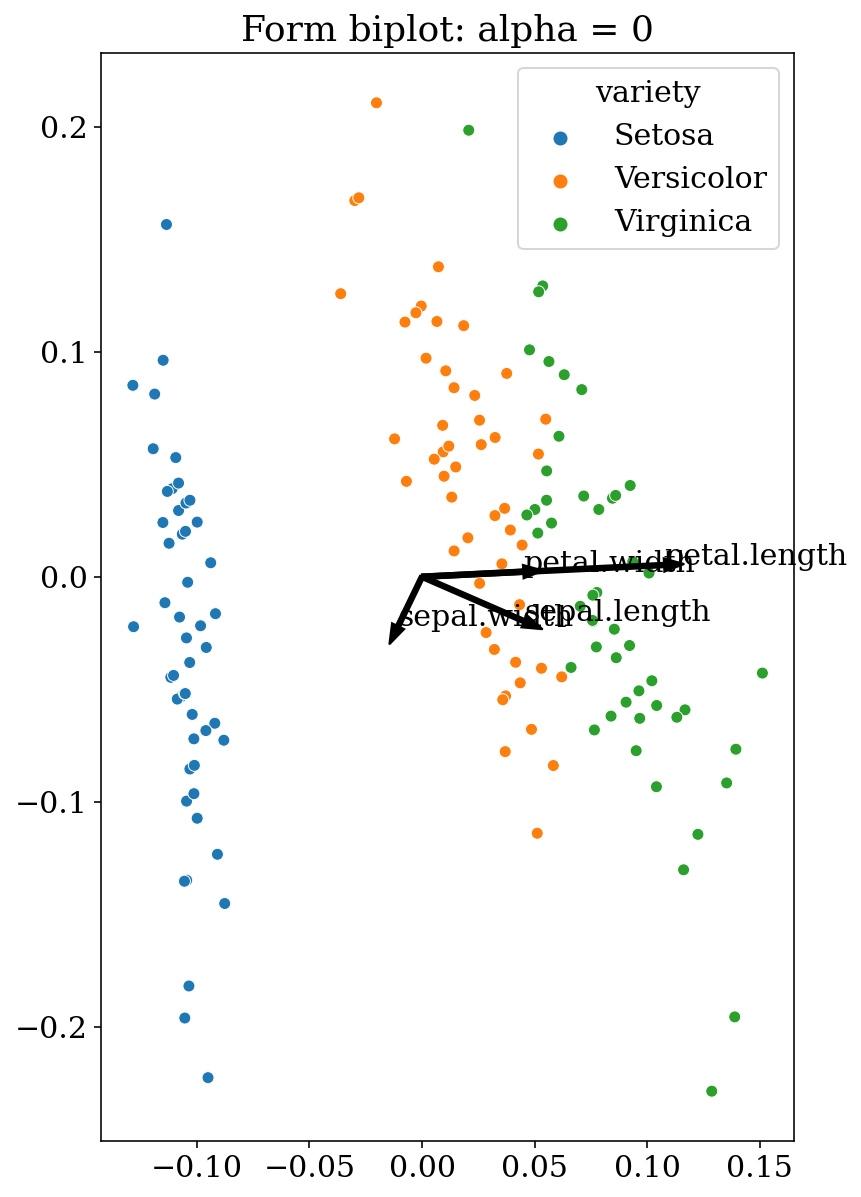

In [ ]:
comp_index = np.array([0,1])

plt.figure(figsize=[10,10])
sns.scatterplot(G[:,comp_index[0]],G[:,comp_index[1]],hue = iris['variety'])
for i in range(D):
    plt.arrow(0, 0, H[comp_index[0],i]/200,
              H[comp_index[1],i]/200, width = 0.002,
              color='black',zorder = 2)
    plt.text(H[comp_index[0],i]/200, H[comp_index[1],i]/200, iris.columns[i], size = 15, zorder = 20)
plt.gca().set(aspect='equal')
plt.title('Form biplot: alpha = '+str(alpha))

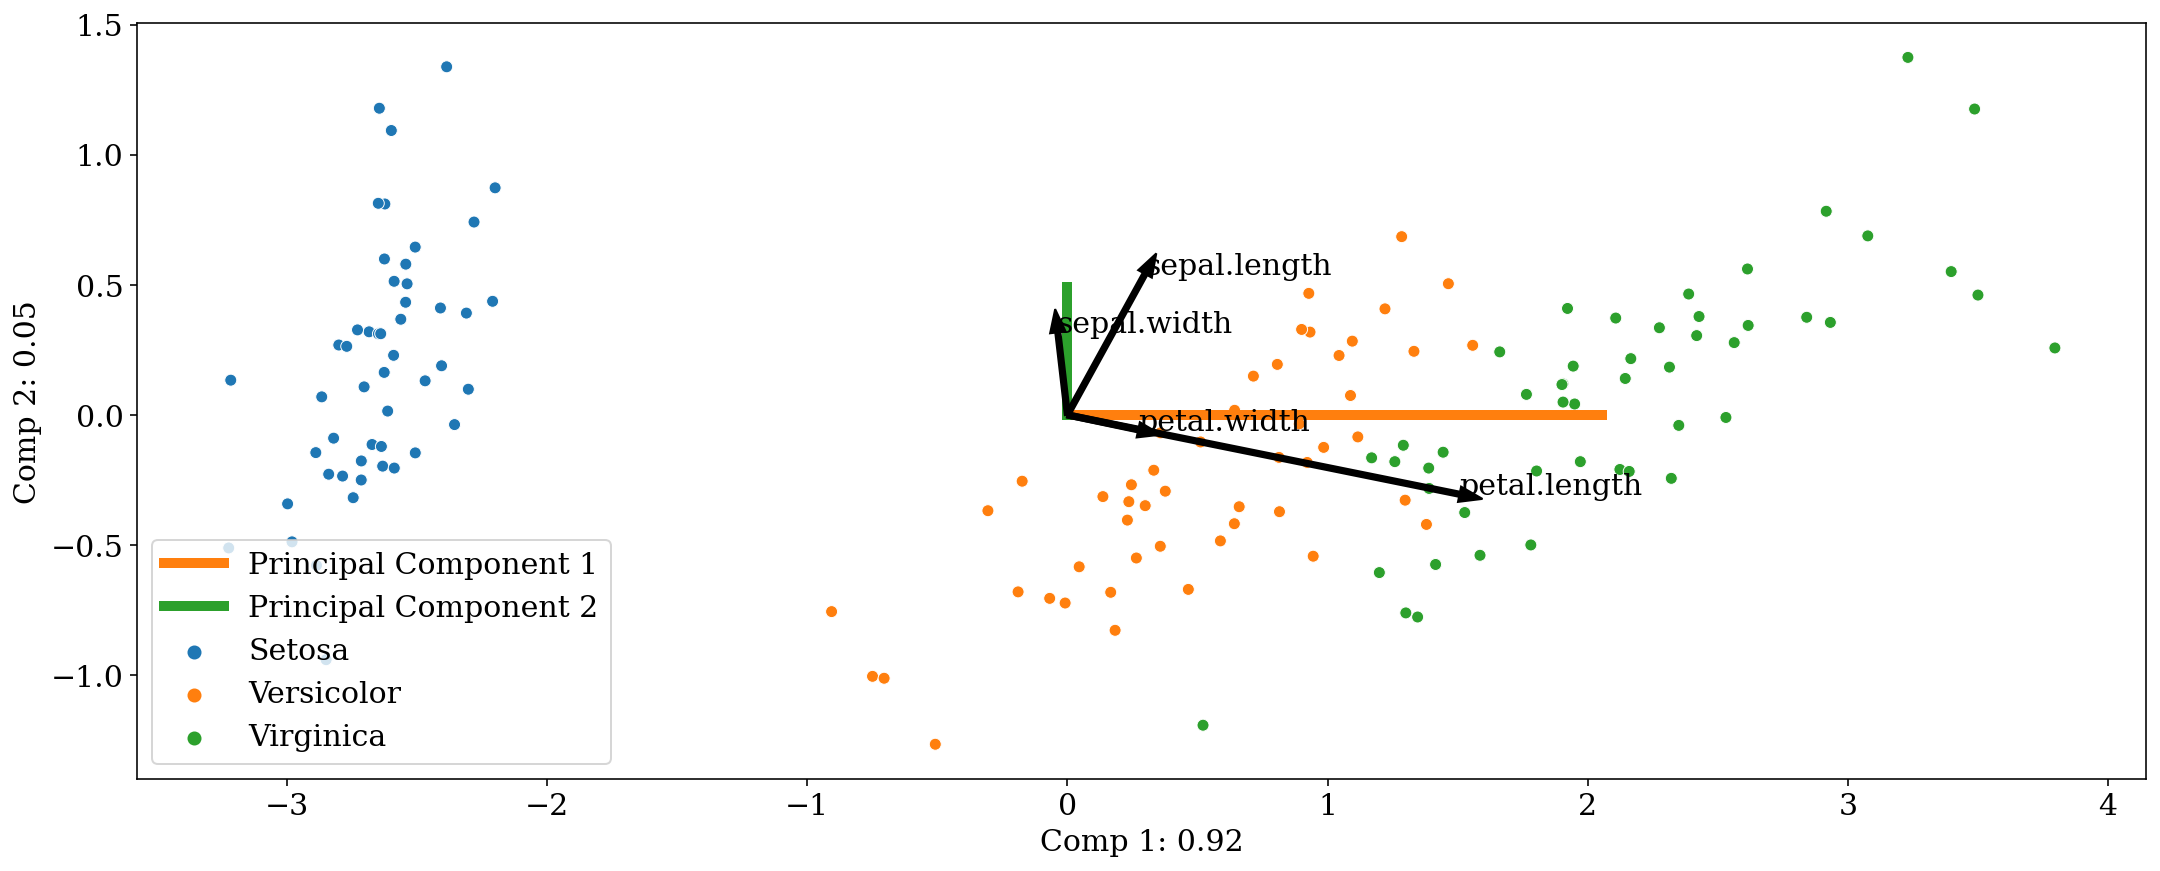

In [ ]:
# biplot for 3 variables, plot in principal component space
# same as the covariance biplot
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(iris[iris.columns[:-1]].values)
std_iris = np.std(iris[iris.columns[:-1]].values,axis = 0)

plt.figure(figsize=[18,18])
pc_scores = pca.transform(iris[iris.columns[:-1]].values)

D = 4
comp_index = np.array([0,1])

sns.scatterplot(pc_scores[:,comp_index[0]],pc_scores[:,comp_index[1]],hue = iris['variety'])

plt.plot([0, np.sqrt(pca.explained_variance_[comp_index[0]])], [0, 0], linewidth=5,
          color=f"C{comp_index[0]+1}", label=f"Principal Component {comp_index[0]+1}")

plt.plot([0, 0], [0, np.sqrt(pca.explained_variance_[comp_index[1]])], linewidth=5,
          color=f"C{comp_index[1]+1}", label=f"Principal Component {comp_index[1]+1}")



for i in range(D):
    plt.arrow(0, 0,  pca.components_[comp_index[0],i]*std_iris[i],
              pca.components_[comp_index[1],i]*std_iris[i], width = 0.02,
            color='black',zorder = 2)
    
    # plt.plot([0, -pca.components_[comp_index[0],i]*std_iris[i]],[0,
    #           -pca.components_[comp_index[1],i]*std_iris[i]], linewidth = 3,
    #         color='black',zorder = 2,linestyle = '--')
    
    plt.text(pca.components_[comp_index[0],i]*std_iris[i],pca.components_[comp_index[1],i]*std_iris[i], iris.columns[i], size = 15, zorder = 20)

plt.gca().set(aspect='equal')   
plt.xlabel('Comp '+str(comp_index[0]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[0]],2)))
plt.ylabel('Comp '+str(comp_index[1]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[1]],2)))

plt.legend(loc = 'lower left')